<a href="https://colab.research.google.com/github/AryanGoyal123/Machine-learning-Projects/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(
    n_samples = 300,
    n_features = 2,
    centers = 2,
    cluster_std = 1.0,
    random_state = 101
)

In [ ]:
X, y = data

In [ ]:
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [ ]:
feat = pd.DataFrame(X)

In [ ]:
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [ ]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


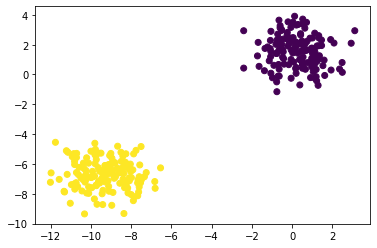

In [ ]:
plt.scatter(feat['X1'], feat['X2'], c = y)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
#make an autoencoder and figure out which features are important in order to make a different between the two


In [ ]:
# 3 inputs to 2 then to 3 again

In [ ]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))


In [ ]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation='relu', input_shape=[2]))

In [ ]:
autoencoder = Sequential([encoder, decoder]) #combine the two 

In [ ]:
autoencoder.compile(loss = 'mse', optimizer=SGD(lr =1.5))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [ ]:
autoencoder.fit(scaled_data, scaled_data, epochs = 5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.1661
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1338
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1302
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1294


In [ ]:
encoded_2dim = encoder.predict(scaled_data)

In [ ]:
encoded_2dim.shape

(300, 2)

In [ ]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1],c=y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>